# PART B: LOGISTIC REGRESSION ON THE CREDIT CARD DATA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, KFold, GroupKFold, cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix

from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain
from scikitplot.helpers import cumulative_gain_curve

from library import load_credit_card_data, load_breast_cancer_data
from library import cv_classification_scores_logreg
from library import LogReg

from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain


## Load the data and scales it. 

In [3]:
data, targets = load_credit_card_data()

data = np.array(data)
targets = np.array(targets)

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = test_size)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Grid seatch for finding the optimal values for learning rate and iterations. 

In [ ]:
# GRID SEARCH FOR FINDING OPTIMAL NUMBER OF ITERATIONS AND LEARNING RATE.
#DOING A GRID SEARCH FOR FINE TUNING OF THE PARAMETERS.
max_exp = -3
min_exp = -6

#Initialization of the learning rate parameters.
lr_values = np.logspace(min_exp,max_exp, abs(min_exp-max_exp)+1)
n_lr_values = len(lr_values)

#Initialization of the number of iterations.
iterations_values = [10, 25, 100, 200, 300, 500]
n_iterations_values = len(iterations_values)

#Empty arrays to contain the results from the grid-search.
auc_scores = np.zeros(shape=(n_lr_values, n_iterations_values))
accuracy_scores = np.zeros(shape=(n_lr_values, n_iterations_values))
area_ratio_scores = np.zeros(shape=(n_lr_values, n_iterations_values))

#Iterates over the grid and updates the arrays.
for i, learning_rate in enumerate(lr_values):
    for j,n_iter in enumerate(iterations_values):
        logreg = LogReg(iterations=n_iter, alpha = learning_rate)
        cv_area_ratio, cv_auc, cv_accuracy = cv_classification_scores_logreg(5, data, targets, logreg)
        auc_scores[i,j] = cv_auc
        accuracy_scores[i,j] = cv_accuracy
        area_ratio_scores[i,j] = cv_area_ratio
        print(area_ratio_scores[i,j])


#PLOTTING HEATMAPS FOR THE GRIDSEARCH
auc_scores = pd.DataFrame(auc_scores, columns=np.round(iterations_values,6), index =np.round(lr_values,6) )
accuracy_scores = pd.DataFrame(accuracy_scores, columns=np.round(iterations_values,6), index =np.round(lr_values,6) )
area_ratio_scores = pd.DataFrame(area_ratio_scores, columns=np.round(iterations_values,6), index =np.round(lr_values,6) )

plt.subplot(121)
ax = sns.heatmap(area_ratio_scores, annot=True, fmt=".4f", linewidths=0.5, cbar_kws={"label": "area ratio score" })
plt.ylim(top = 0, bottom=n_lr_values)
plt.xlabel("number of iterations")
plt.ylabel("learning rate")

plt.subplot(122)
ax = sns.heatmap(accuracy_scores, annot=True, fmt=".4f", linewidths=0.5, cbar_kws={"label": "accuracy score" })
plt.ylim(top = 0, bottom=n_lr_values)
plt.xlabel("number of iterations")
plt.ylabel("learning rate")

plt.show()

0.7553601027485509
0.7937333333333334
0.4987778598994505
0.4987778598994505
0.7558951605270611
0.7960333333333333
0.4999793437810558
0.4999793437810558
0.7567132808133827
0.8058666666666667
0.5015793768228296
0.5015793768228296


## Plotting of confusion matrix, roc-curve and cumulative gains curve. 

Test-accuracy:  0.8178333333333333


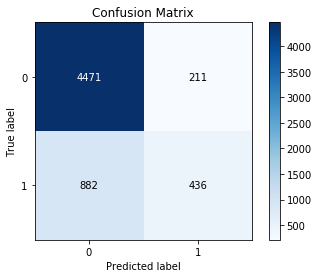

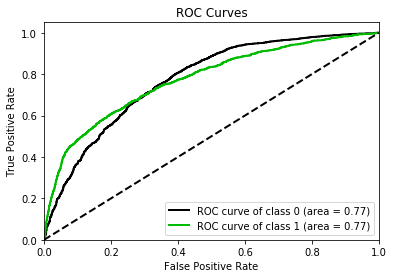

4282.400606980273


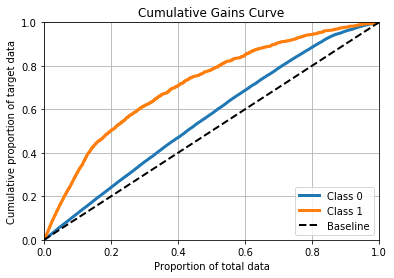

In [4]:
#Found the best values of learning rate and number of iterations. lr = 0.0001, iterations = 250.
logreg_best = LogReg(iterations = 350, alpha = 0.0001)

logreg_best.fit(X_train, y_train)

y_probabilities = logreg_best.probabilities(X_test)
y_pred = logreg_best.predict(X_test, threshold=0.5)

print("Test-accuracy: ", accuracy_score(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred)
plt.ylim(top = -0.5, bottom = 1.5)
plt.show()

# plt.show()

temp = np.concatenate((1-y_probabilities, y_probabilities), axis=1)

plot_roc(y_test, temp, plot_micro=False, plot_macro=False)
plt.show()

ax = plot_cumulative_gain(y_test, temp)
x_data, y_data = cumulative_gain_curve(y_test, temp[:,1])
print(np.trapz(y_data))
plt.ylabel("Cumulative proportion of target data")
plt.xlabel("Proportion of total data")
plt.show()